In [ ]:
# Importing the dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from google.colab import files
from torchsummary import summary

# Importing libraries
import csv
import ntpath
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import random
import imgaug.augmenters as iaa

In [ ]:
# Cloning the repository containing the dataset
!git clone https://github.com/NavoditC/End-to-End-Learning.git

Cloning into 'End-to-End-Learning'...
remote: Enumerating objects: 16678, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 16678 (delta 1), reused 6 (delta 1), pack-reused 16672
Receiving objects: 100% (16678/16678), 209.34 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (16669/16669), done.


In [ ]:
# Read the data in a dataframe
path = 'End-to-End-Learning/data/driving_log.csv'
column_names = ['center_image_path','left_image_path','right_image_path','steering angle','throttle','brake','speed']
df = pd.read_csv(path,names=column_names)

In [ ]:
# Extract the relevant path to be used for the images in Google Colab
def split_path(path):
  head,leaf = ntpath.split(path)
  return leaf

df['center_image_path'] = df['center_image_path'].apply(split_path)
df['left_image_path'] = df['left_image_path'].apply(split_path)
df['right_image_path'] = df['right_image_path'].apply(split_path)

df.head()

,center_image_path,left_image_path,right_image_path,steering angle,throttle,brake,speed
0,center_2022_02_27_19_27_14_164.jpg,left_2022_02_27_19_27_14_164.jpg,right_2022_02_27_19_27_14_164.jpg,0.0,0.0,0.0,0.000156
1,center_2022_02_27_19_27_14_265.jpg,left_2022_02_27_19_27_14_265.jpg,right_2022_02_27_19_27_14_265.jpg,0.0,0.0,0.0,0.000156
2,center_2022_02_27_19_27_14_366.jpg,left_2022_02_27_19_27_14_366.jpg,right_2022_02_27_19_27_14_366.jpg,0.0,0.0,0.0,0.000156
3,center_2022_02_27_19_27_14_470.jpg,left_2022_02_27_19_27_14_470.jpg,right_2022_02_27_19_27_14_470.jpg,0.0,0.0,0.0,0.000155
4,center_2022_02_27_19_27_14_570.jpg,left_2022_02_27_19_27_14_570.jpg,right_2022_02_27_19_27_14_570.jpg,0.0,0.0,0.0,0.000156


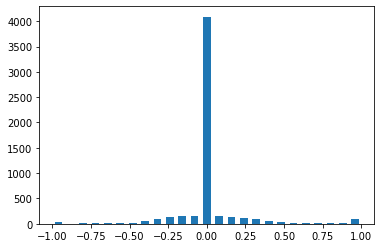

In [ ]:
# Visualize the distribution of the steering angle
steering_angle = df['steering angle']
total_bins = 25
histogram, bins = np.histogram(steering_angle, total_bins)
bins1 = (bins[1:]+bins[:-1])*0.5
plt.bar(bins1, histogram, width = 0.05)
plt.show()

In [ ]:
steering_count = 300
delete_list = []
for i in range(len(bins)-1):
  bin_list = []
  for j in range(len(steering_angle)):
    if steering_angle[j]>=bins[i] and steering_angle[j]<bins[i+1]:
      bin_list.append(j)
  random.shuffle(bin_list)
  if len(bin_list) > steering_count:
    bin_list = bin_list[steering_count:]
    delete_list.extend(bin_list)

In [ ]:
df.drop(df.index[delete_list], inplace=True)

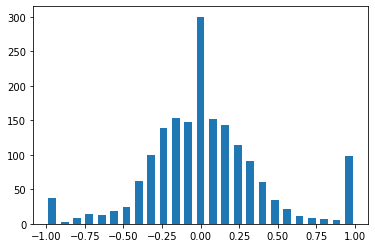

In [ ]:
steering_angle = df['steering angle']
total_bins = 25
histogram, bins = np.histogram(steering_angle, total_bins)
bins1 = (bins[1:]+bins[:-1])*0.5
plt.bar(bins1, histogram, width = 0.05)
plt.show()

In [ ]:
os.makedirs('End-to-End-Learning/data', exist_ok=True)  
df.to_csv('End-to-End-Learning/data/drive.csv',index=False)

In [ ]:
# Reading the csv file which containing the image paths and the steering angle, throttle, brake and speed to make the vehicle perform better on turns
# dataset1 = []
# with open('End-to-End-Learning/data/drive.csv') as csv_file:
#     csv_reader = csv.reader(csv_file)
#     next(csv_reader, None) # To skip the first line which contains the column names of the dataframe
#     for line in csv_reader:
#         dataset1.append(line)
    

In [ ]:
# Reading the csv file which containing the image paths and the steering angle, throttle, brake and speed
dataset = []
with open('End-to-End-Learning/data/drive.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader, None) # To skip the first line which contains the column names of the dataframe
    for line in csv_reader:
        dataset.append(line)

**Data augmentation techniques used in the code to enable the model to generalize better**

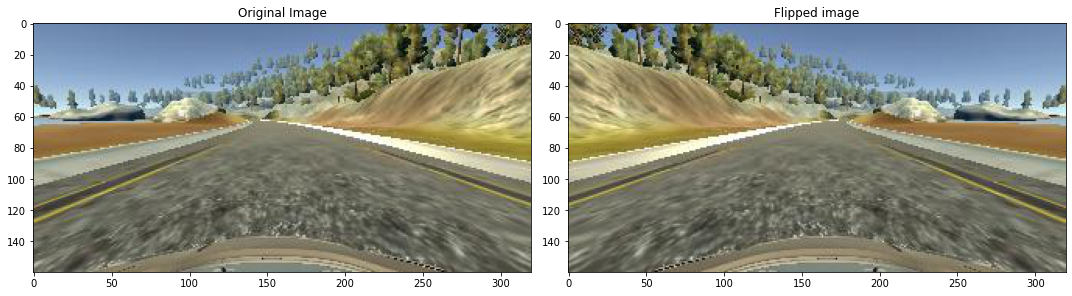

In [ ]:
# Flip the image

random_number = random.randint(0,len(dataset))
img = mpimg.imread('End-to-End-Learning/data/IMG/' + dataset[random_number][0])

img_flipped = cv.flip(img,1)
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(img_flipped)
ax[1].set_title('Flipped image')

fig.tight_layout()
plt.show()

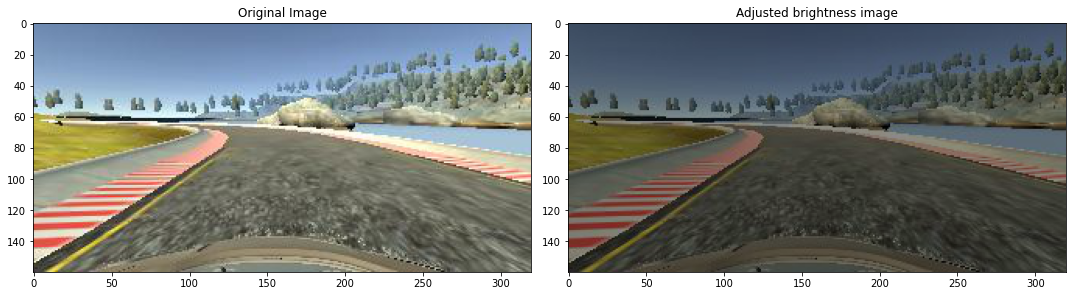

In [ ]:
# Adjust the brightness of the image for different times of the day

random_number = random.randint(0,len(dataset))
img = mpimg.imread('End-to-End-Learning/data/IMG/' + dataset[random_number][0])

current_image_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
adjustment = 0.5 + np.random.rand()*0.5
current_image_hsv[:,:,2] = current_image_hsv[:,:,2]*adjustment
img_adjusted = cv.cvtColor(current_image_hsv,cv.COLOR_HSV2BGR)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(img_adjusted)
ax[1].set_title('Adjusted brightness image')

fig.tight_layout()
plt.show()

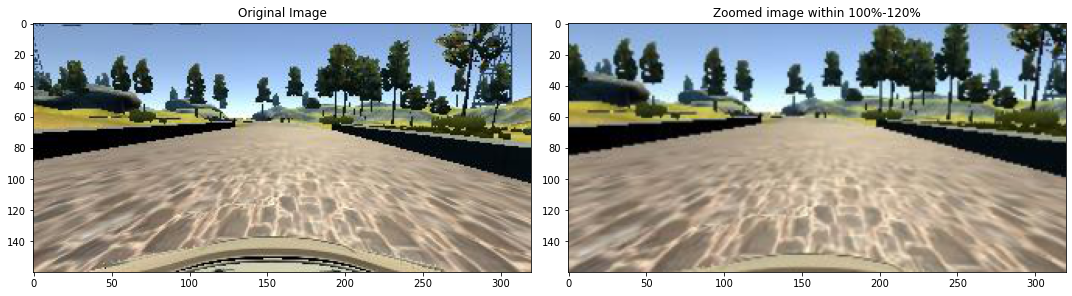

In [ ]:
# Zoom into the image within a tolerance of 20%

random_number = random.randint(0,len(dataset))
img = mpimg.imread('End-to-End-Learning/data/IMG/' + dataset[random_number][0])

zoom = iaa.Affine(scale=(1, 1.2))
img_zoomed = zoom.augment_image(img)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(img_zoomed)
ax[1].set_title('Zoomed image within 100%-120%')

fig.tight_layout()
plt.show()

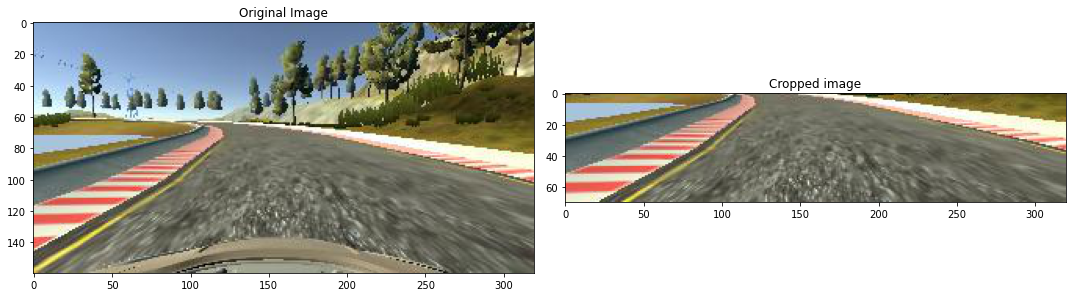

In [ ]:
# Image pre-processing to be applied to all images
random_number = random.randint(0,len(dataset))
img = mpimg.imread('End-to-End-Learning/data/IMG/' + dataset[random_number][0])
img_cropped = img[65:135,:]
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(img_cropped)
ax[1].set_title('Cropped image')

fig.tight_layout()
plt.show()

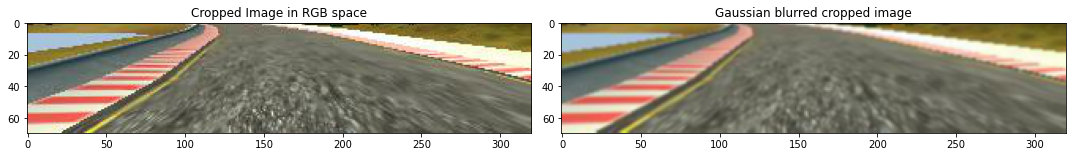

In [ ]:
# Convert the RGB image into YUV space for better results 
img_blurred = cv.GaussianBlur(img_cropped,  (3, 3), 0)
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

ax[0].imshow(img_cropped)
ax[0].set_title('Cropped Image in RGB space')
ax[1].imshow(img_blurred)
ax[1].set_title('Gaussian blurred cropped image')

fig.tight_layout()
plt.show()

In [ ]:
# Performing train-test split and storing the train and test data
total_samples = len(dataset)
train_samples = int(0.8*total_samples)
test_samples = total_samples - train_samples
train_test_lengths = [train_samples,test_samples]
train_data, test_data = random_split(dataset, lengths = train_test_lengths)

In [ ]:
# Function to perform pre-processing operations in order to achieve data augmentation
def augment(filename, steering_angle, isTraining):
  filepath = 'End-to-End-Learning/data/IMG/' + filename.split('/')[-1]
  current_image = cv.imread(filepath)
  if isTraining == True:
    # Flip the image with a 50% prrobability to augment the dataset
    if np.random.rand() < 0.5:
      current_image = cv.flip(current_image, 1)
      steering_angle = steering_angle * -1.0  

    # Adjust the brightness of the image to make the model adjust to different times of the day
    if np.random.rand() < 0.5:
      current_image_hsv = cv.cvtColor(current_image,cv.COLOR_BGR2HSV)
      adjustment = 0.5 + np.random.rand()*0.5
      current_image_hsv[:,:,2] = current_image_hsv[:,:,2]*adjustment
      current_image = cv.cvtColor(current_image_hsv,cv.COLOR_HSV2BGR)

    # Zoom into the image within a tolerance of 20%
    if np.random.rand() < 0.5:
      zoom = iaa.Affine(scale=(1, 1.2))
      current_image = zoom.augment_image(current_image)

  # Crop the image to extract only the road and apply Gaussian blurring to remove noise present in the image
  current_image = current_image[65:135, :, :]
  current_image = cv.GaussianBlur(current_image,  (3, 3), 0)
  return current_image, steering_angle

class MyDataset(Dataset):

    def __init__(self, subset, transform=None, isTraining=True):
        self.subset = subset
        self.transform = transform
        self.isTraining = isTraining

    def __getitem__(self, index):
        batch_samples = self.subset[index]
        # Store the steering angle
        steering_angle = float(batch_samples[3])
        # Augment the images taken from the center camera and perform image transformations
        center_image, steering_angle_center = augment(batch_samples[0], steering_angle, self.isTraining)
        center_image = self.transform(center_image)
        # Augment the images taken from the left camera and perform image transformations
        left_image, steering_angle_left = augment(batch_samples[1], steering_angle + 0.15, self.isTraining)
        left_image = self.transform(left_image)
        # Augment the images taken from the right camera and perform image transformations
        right_image, steering_angle_right = augment(batch_samples[2], steering_angle - 0.15, self.isTraining)
        right_image = self.transform(right_image)
        # Return the center, left and right images with the corresponding steering angles
        return (center_image, steering_angle_center), (left_image, steering_angle_left), (right_image, steering_angle_right)
      
    def __len__(self):
        return len(self.subset)


In [ ]:
params = {'batch_size': 64, 'shuffle': True, 'num_workers': 4}
          
# Define the transformation to normailize the image such that the pixel intensities lie between 0 and 1
training_set = MyDataset(train_data, transform = transforms.Compose([transforms.Lambda(lambda x: (x / 255.0))]), isTraining=True)
test_set = MyDataset(test_data, transform = transforms.Compose([transforms.Lambda(lambda x: (x / 255.0))]), isTraining=False)

# Define the training and test generator which is called batch-wise during training and testing respectively
training_generator = DataLoader(training_set, **params)
test_generator = DataLoader(test_set, **params)

In [ ]:
# Defining the Convolutional Neural Network model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 24, 3, stride=2)
        self.conv2 = nn.Conv2d(24, 48, 3, stride=2)
        self.pool = nn.MaxPool2d(4, stride=4)
        self.drop = nn.Dropout(p=0.25)
        self.fc1 = nn.Linear(48*4*19,50)
        self.fc2 = nn.Linear(50, 10)
        self.fc3 = nn.Linear(10,1)

    def forward(self, x):
        x = x.view(x.size(0), 3, 70, 320)
        x = F.elu(self.conv1(x))
        x = self.drop(self.pool(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.elu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return x

model = Net()


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model1 = Net().to(device)
summary(model1, (1,3,70,320))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 24, 34, 159]             672
            Conv2d-2           [-1, 48, 16, 79]          10,416
         MaxPool2d-3            [-1, 48, 4, 19]               0
           Dropout-4            [-1, 48, 4, 19]               0
            Linear-5                   [-1, 50]         182,450
            Linear-6                   [-1, 10]             510
            Linear-7                    [-1, 1]              11
Total params: 194,059
Trainable params: 194,059
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.26
Forward/backward pass size (MB): 1.51
Params size (MB): 0.74
Estimated Total Size (MB): 2.51
----------------------------------------------------------------


In [ ]:
# Using the MSE loss as the loss function Adam as the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch: [1/100], loss: 0.623939860984683
Epoch: [2/100], loss: 0.4652134247124195
Epoch: [3/100], loss: 0.4408778712153435
Epoch: [4/100], loss: 0.41434780657291415
Epoch: [5/100], loss: 0.3586836067959666
Epoch: [6/100], loss: 0.35552903190255164
Epoch: [7/100], loss: 0.30201768726110456
Epoch: [8/100], loss: 0.2762950636446476
Epoch: [9/100], loss: 0.27194581404328344
Epoch: [10/100], loss: 0.2632715152576566
Epoch: [11/100], loss: 0.23601071983575822
Epoch: [12/100], loss: 0.22474989164620637
Epoch: [13/100], loss: 0.24797870609909295
Epoch: [14/100], loss: 0.2098458891734481
Epoch: [15/100], loss: 0.2151358537375927
Epoch: [16/100], loss: 0.2210995126515627
Epoch: [17/100], loss: 0.2086890421807766
Epoch: [18/100], loss: 0.20207082964479922
Epoch: [19/100], loss: 0.18664141986519098
Epoch: [20/100], loss: 0.2091053742915392
Epoch: [21/100], loss: 0.18745524967089294
Epoch: [22/100], loss: 0.20392261296510697
Epoch: [23/100], loss: 0.17385520664975046
Epoch: [24/100], loss: 0.1802157

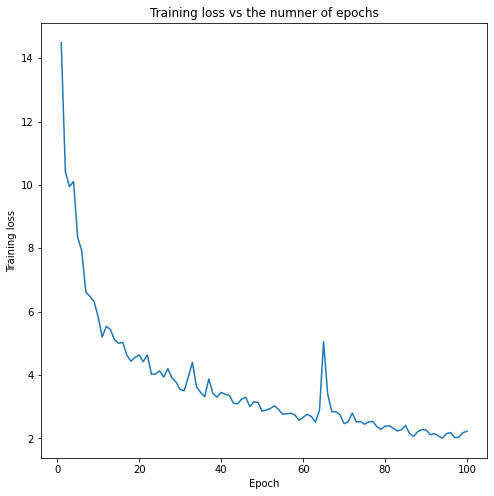

In [ ]:
# Training the network
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def convert_tensor(data, device):
  img, steering_angle = data
  img = img.float().to(device)
  steering_angle = steering_angle.float().to(device)
  return img, steering_angle

epochs = 100
train_loss = []
for epoch in range(epochs):  # loop over the dataset multiple times
    model.to(device)
    running_loss = 0.0
    model.train()
    # data in the trainloader consists of three tuples 
    for i, (center, left, right) in enumerate(training_generator):
      center, left, right = convert_tensor(center, device), convert_tensor(left, device), convert_tensor(right, device)
      # zero the parameter gradients
      optimizer.zero_grad()

      # get the input; data is a list of [inputs, labels]
      datas = [center, left, right]
      for data in datas:
        img, steering_angle = data

        # forward + backward + optimize
        output = model(img)
        loss = criterion(output, steering_angle.unsqueeze(1))
        loss.backward()
        optimizer.step()

        running_loss += loss.data.item()
      
      if (i+1) % 20 == 0:    # print every 20 mini-batches
          print("Epoch: [{}/{}], loss: {}".format(epoch+1, epochs, running_loss / (i+1)))
    train_loss.append(running_loss)      

print('Finished Training!')
plt.figure(figsize=(8,8))
plt.plot(1+np.arange(len(train_loss)),train_loss)
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.title('Training loss vs the numner of epochs')
plt.show()

In [ ]:
# Testing the network

model.eval()
test_loss = []

with torch.set_grad_enabled(False):
      for i, (center, left, right) in enumerate(test_generator):
        running_loss = 0
        center, left, right = convert_tensor(center, device), convert_tensor(left, device), convert_tensor(right, device)
        # zero the parameter gradients
        optimizer.zero_grad()    
        # get the input; data is a list of [inputs, labels]
        datas = [center, left, right]        
        for data in datas:
          img, steering_angle = data
          output = model(img)
          loss = criterion(output, steering_angle.unsqueeze(1))
          running_loss += loss.data.item()
          test_loss.append(running_loss)

In [ ]:
print('Test Loss: %.3f '% (sum(test_loss)/(len(test_loss))))
                   

Test Loss: 0.113 


In [ ]:
# Saving the model
state = {'model': model.module if device == 'cuda:0' else model,}
torch.save(state, 'model.h5')
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>